## 7. 인공신경망


### 7.1 특징
+ 인공신경망 모형은 동물의 뇌신경계를 모방하여 분류 또는 예측하기 위해 만들어진 모형이다. 인공신경망에서는 입력은 인간의 뇌의 시냅스에 해당하며 개별 신호의 강도에 따라 가중되며, 활성 함수는 인공신경망의 출력을 계산한다.
+ 인공신경망은 가중치를 반복적으로 조정하며 학습하며 뉴런들은 링크로 연결되어 있고, 각 링크에는 수치적인 가중치가 있다. 인공신경망은 신경망의 가중치를 초기화하고 훈련 데이터를 통해 가중치를 갱신하여 신경망의 구조를 선택하고, 활용할 학습 알고리즘을 결정한 후 신경망을 훈련시킨다.


가. 구조
+ 입력 링크에서 여러 신호를 받아서 새로운 활성화 수준을 계산하고, 출력 링크로 출력 신호를 보낸다.
+ 입력신호는 미가공 데이터 또는 다른 뉴런으로 출력이 될 수 있으며, 출력신호는 문제의 최종적인 해가 되거나 다른 뉴런에 입력될 수 있다.

나. 뉴런의 계산
+ 뉴런은 활성화 함수를 사용하며, 활성화 함수를 이용해 출력을 결정하며 입력신호의 가중치 합을 계산하여 임계값과 비교한다.
+ 가중치 합이 임계값보다 작으면 뉴런의 출력은 -1, 같거나 크면 +1 을 출력한다.

다. 뉴런의 활성화 함수
+ 시그모이드 함수의 경우 로지스틱 회귀분석과 유사하며, 0~1의 확률값을 가진다.
+ softmax 함수 : 표준화지수 함수로도 불리며, 출력값이 여러 개로 주어지고 목표치가 다범주인 경우 각 범주에 속할 사후확률을 제공하는 함수이다.
+ Relu 함수 : max(0, x)로 최근 딥러닝에 많이 활용하는 함수이다.

### 7.2 sklearn.neural_network.MLPClassifier

> class sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100,), activation='relu', *,
solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant',
learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None,
tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08,
n_iter_no_change=10, max_fun=15000)

### 7.3 조정 할만한 매개변수
1. hidden_layer_sizes
> tuple, length = n_layers -2, default = (100,)

2. activation {'identity', 'logistic', 'tanh', 'relu'}, default = 'relu
> 'identity' : 선형함수  
'logistic' : 시그모이드 함수, f(x) = 1 / (1+ exp(-x)) 값을 리턴  
'tanh' : 탄젠트 함수 f(x) = tanh(x) 값을 리턴  
'relu' : 수정된 선형 함수, f(x) = max(0, x) 값을 리턴

3. solver {'lbfgs', 'sgd', 'adam'}, default = 'adam'
> 'lbfgs; : quasi-Newton 방법 계열의 최적화 도구로 0 또는 함수의 극대값과 극소값을 찾는데 사용되는 방법  
'sgd' : 경사하강법  
'adam' : 확률적 기울기 기반 옵티마이저  
큰 데이터 셋에는 adam, 작은 데이터 셋에는 lbfgs 를 추천

### 7.4 인공신경망 분류 실습
credit 데이터의 train 데이터로 credit.rating(기간 내 대출 상환 여부)을 분류하는 인공신경망 모델 만들어라

      pred_T[0]  pred_F[0]
T[0]         39         51
F[0]         30        180
train Accuracy : 0.9271428571428572
test Accuracy : 0.73
recall score : 0.8571428571428571
precision score : 0.7792207792207793
f1 score : 0.8163265306122449
roc_auc score : 0.7383068783068784


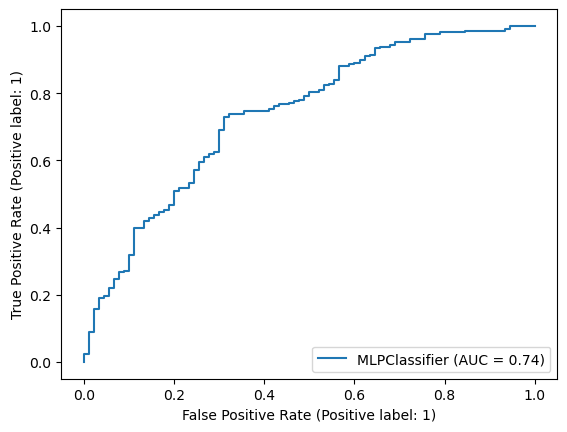

In [10]:
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt

credit = pd.read_csv('https://raw.githubusercontent.com/phong0104/Alex_Lee_SNU_EduTech/9e65152ae7b230d9c940d03dbdc9e468f69cf426/Certificate/(2)%20%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%20%EC%A0%84%EB%AC%B8%EA%B0%80%20%EC%8B%A4%EA%B8%B0/Ver.2/data/credit_final.csv')
X = credit.drop(['credit.rating'], axis = 1)
y = credit['credit.rating']


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score, roc_auc_score, RocCurveDisplay
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,stratify=y, test_size = 0.3, random_state = 42)
mlp_clf = MLPClassifier()
mlp_clf.fit(X_train, y_train)

y_pred = mlp_clf.predict(X_test)

# 오차행렬
print(pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['T[0]', 'F[0]'], columns= ['pred_T[0]', 'pred_F[0]']))

# 평가지표
print('train Accuracy :', mlp_clf.score(X_train, y_train))
print('test Accuracy :', mlp_clf.score(X_test, y_test))
print('recall score :', recall_score(y_test , y_pred))
print('precision score :', precision_score(y_test , y_pred))
print('f1 score :', f1_score(y_test , y_pred))
print('roc_auc score :', roc_auc_score(y_test, mlp_clf.predict_proba(X_test)[:,1]))

# ROC 곡선 시각화
RocCurveDisplay.from_estimator(mlp_clf, X_test, y_test)
plt.show()
# 스케일링 안했을 때 : 0.55
# 스케일링 했을 때 : 0.74

GridSearchCV 사용

In [11]:
MLPClassifier().get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [12]:
param_grid = {'activation' : ['relu', 'tanh'], 'hidden_layer_sizes' : [(100,), (150,), (200,)],
              'solver' : ['adam', 'sgd']}
from sklearn.model_selection import GridSearchCV
mlp = MLPClassifier()
grid_mlp = GridSearchCV(mlp, param_grid)
grid_mlp.fit(X_train, y_train)

grid_mlp.best_params_

{'activation': 'tanh', 'hidden_layer_sizes': (150,), 'solver': 'adam'}

In [19]:
result = pd.DataFrame(grid_mlp.cv_results_['params'])
result['mean_test_score'] = grid_mlp.cv_results_['mean_test_score']
result.sort_values(by = 'mean_test_score', ascending=False).reset_index(drop = True)

,activation,hidden_layer_sizes,solver,mean_test_score
0,tanh,"(150,)",adam,0.771429
1,tanh,"(100,)",adam,0.768571
2,tanh,"(100,)",sgd,0.768571
3,tanh,"(200,)",adam,0.765714
4,tanh,"(200,)",sgd,0.765714
5,tanh,"(150,)",sgd,0.761429
6,relu,"(100,)",sgd,0.754286
7,relu,"(150,)",sgd,0.752857
8,relu,"(200,)",sgd,0.750000
9,relu,"(150,)",adam,0.735714


      pred_T[0]  pred_F[0]
T[0]         42         48
F[0]         26        184
train Accuracy : 0.8971428571428571
test Accuracy : 0.7533333333333333
recall score : 0.8761904761904762
precision score : 0.7931034482758621
f1 score : 0.832579185520362
roc_auc score : 0.7926984126984128


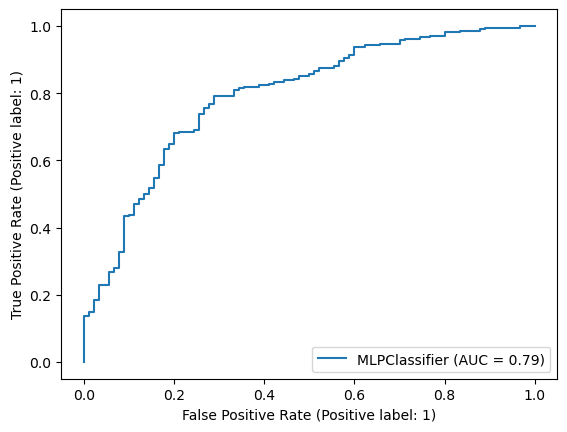

In [20]:
mlp_clf = MLPClassifier(activation='tanh', hidden_layer_sizes=(150,), solver='adam')
mlp_clf.fit(X_train, y_train)

y_pred = mlp_clf.predict(X_test)

# 오차행렬
print(pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['T[0]', 'F[0]'], columns= ['pred_T[0]', 'pred_F[0]']))

# 평가지표
print('train Accuracy :', mlp_clf.score(X_train, y_train))
print('test Accuracy :', mlp_clf.score(X_test, y_test))
print('recall score :', recall_score(y_test , y_pred))
print('precision score :', precision_score(y_test , y_pred))
print('f1 score :', f1_score(y_test , y_pred))
print('roc_auc score :', roc_auc_score(y_test, mlp_clf.predict_proba(X_test)[:,1]))

# ROC 곡선 시각화
RocCurveDisplay.from_estimator(mlp_clf, X_test, y_test)
plt.show()

### 7.5 인공신경망(회귀) 실습

In [25]:
import pandas as pd
import numpy as np
kc_house = pd.read_csv('https://raw.githubusercontent.com/phong0104/Alex_Lee_SNU_EduTech/9e65152ae7b230d9c940d03dbdc9e468f69cf426/Certificate/(2)%20%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%20%EC%A0%84%EB%AC%B8%EA%B0%80%20%EC%8B%A4%EA%B8%B0/Ver.2/data/kc_house_data.csv')
kc_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,standard,0,3,7,1180,0,1955,0,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,standard,0,3,7,2170,400,1951,1991,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,standard,0,3,6,770,0,1933,0,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,standard,0,5,7,1050,910,1965,0,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,standard,0,3,8,1680,0,1987,0,1800,7503


In [39]:
X = kc_house.drop(['id', 'date', 'price'], axis = 1)
y = kc_house['price']

X = pd.get_dummies(X, columns = ['waterfront'], drop_first= True)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

mlp_reg = MLPRegressor()
mlp_reg.fit(X_train, y_train)

y_pred = mlp_reg.predict(X_test)

print('train r2 :', mlp_reg.score(X_train, y_train))
print('test r2 :', mlp_reg.score(X_test, y_test))

mse = mean_squared_error(y_test, y_pred)
print('mse :', mse)
print('rmse :', np.sqrt(mse))

# 스케일링 전
## train r2 : 0.53, test r2 : 0.52, rmse : 262789
# 스케일링 후
## train r2 : -1.26, test r2 : -1.17, rmse : 560084

train r2 : -1.3378515493921723
test r2 : -1.2462980220552797
mse : 324290254375.2244
rmse : 569464.8842336325


In [40]:
mlpr = MLPRegressor(hidden_layer_sizes=(64,64,64,64,64), activation= 'relu', solver='adam', max_iter = 1000)
mlpr.fit(X_train, y_train)

y_pred = mlpr.predict(X_test)

print('train r2 :', mlpr.score(X_train, y_train))
print('test r2 :', mlpr.score(X_test, y_test))

mse = mean_squared_error(y_test, y_pred)
print('mse :', mse)
print('rmse :', np.sqrt(mse))

train r2 : 0.8259415714160281
test r2 : 0.7369276067318574
mse : 37978848974.798035
rmse : 194881.6281099838
